<a href="https://colab.research.google.com/github/SinghKajal21/Stock-Market-Prediction-/blob/main/STOCK_MARKET_PREDICTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BPCL (2).csv to BPCL (2).csv


In [ ]:
BPCL = pd.read_csv('BPCL (2).csv')
pd.read_csv('BPCL (2).csv')



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
0,03-01-2000,BPCL,EQ,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720
1,04-01-2000,BPCL,EQ,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820
2,05-01-2000,BPCL,EQ,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538
3,06-01-2000,BPCL,EQ,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554
4,07-01-2000,BPCL,EQ,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187
...,...,...,...,...,...,...,...,...,...,...,...
5301,26-04-2021,BPCL,EQ,423.05,426.00,428.35,417.55,417.60,418.90,421.33,6444098
5302,27-04-2021,BPCL,EQ,418.90,417.50,423.10,416.55,420.00,420.35,420.45,5408165
5303,28-04-2021,BPCL,EQ,420.35,422.00,424.35,414.90,417.15,417.50,419.33,9902533
5304,29-04-2021,BPCL,EQ,417.50,422.00,423.00,417.00,419.00,419.55,420.00,6632804


In [ ]:
BPCL.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
0,03-01-2000,BPCL,EQ,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720
1,04-01-2000,BPCL,EQ,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820
2,05-01-2000,BPCL,EQ,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538
3,06-01-2000,BPCL,EQ,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554
4,07-01-2000,BPCL,EQ,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187


In [ ]:
BPCL.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
5301,26-04-2021,BPCL,EQ,423.05,426.0,428.35,417.55,417.60,418.90,421.33,6444098
5302,27-04-2021,BPCL,EQ,418.90,417.5,423.10,416.55,420.00,420.35,420.45,5408165
5303,28-04-2021,BPCL,EQ,420.35,422.0,424.35,414.90,417.15,417.50,419.33,9902533
5304,29-04-2021,BPCL,EQ,417.50,422.0,423.00,417.00,419.00,419.55,420.00,6632804
5305,30-04-2021,BPCL,EQ,419.55,417.5,437.50,414.65,422.10,421.80,428.14,16851470


In [ ]:
BPCL = BPCL.reset_index()['Close']

In [ ]:
BPCL.shape

(5306,)

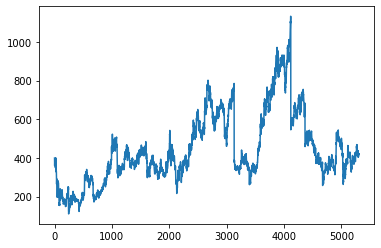

In [ ]:
plt.plot(BPCL)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
BPCL = scaler.fit_transform(np.array(BPCL).reshape(-1,1))

In [ ]:
BPCL.shape

(5306, 1)

In [ ]:
BPCL

array([[0.28255876],
       [0.25445927],
       [0.24414797],
       ...,
       [0.30039584],
       [0.30239945],
       [0.30459854]])

In [ ]:
#splitting dataset into train and test split
training_size=int(len(BPCL)*0.65)
test_size=len(BPCL)-training_size
train_data,test_data=BPCL[0:training_size,:],BPCL[training_size:len(BPCL),:1]

In [ ]:
training_size,test_size

(3448, 1858)

In [ ]:
len(train_data),len(test_data)

(3448, 1858)

In [ ]:
train_data

array([[0.28255876],
       [0.25445927],
       [0.24414797],
       ...,
       [0.24634707],
       [0.24693349],
       [0.24517422]])

In [ ]:
test_data

array([[0.24038509],
       [0.24121585],
       [0.23325026],
       ...,
       [0.30039584],
       [0.30239945],
       [0.30459854]])

In [ ]:
import numpy
def create_dataset(dataset,time_step=1):
  dataX,dataY= [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [ ]:
time_step =100
X_train,y_train = create_dataset(train_data,time_step)
X_test,ytest= create_dataset(test_data,time_step)

In [ ]:
print(X_train)

[[0.28255876 0.25445927 0.24414797 0.26403753 0.26359771 0.26858232
  0.25670723 0.26178957 0.25983482 0.25827103 0.25968822 0.26447735
  0.26066559 0.25514343 0.25328642 0.23950545 0.23300591 0.24996335
  0.25910179 0.26589454 0.26271808 0.28358501 0.26550359 0.25480135
  0.25240678 0.23813713 0.26447735 0.23471632 0.21262767 0.23642672
  0.21771001 0.2149245  0.21267654 0.18711821 0.1796413  0.15667302
  0.15080878 0.15633094 0.15628207 0.17729561 0.16043591 0.16204858
  0.14372282 0.1360993  0.11664956 0.09871475 0.0838098  0.08576455
  0.08649758 0.08669306 0.10037629 0.11088306 0.11024776 0.12730294
  0.14201241 0.14856082 0.13199433 0.11308215 0.13077261 0.14856082
  0.13854274 0.14694815 0.16732639 0.15481601 0.1457753  0.14132825
  0.15882324 0.15486488 0.1546694  0.14802326 0.14689928 0.13409568
  0.12671651 0.10995455 0.09695548 0.09265504 0.08429849 0.08512926
  0.07867859 0.06377364 0.04344427 0.0515076  0.05732297 0.05013928
  0.04500806 0.04769584 0.05057909 0.04842887 0.

In [ ]:
print(X_train.shape), print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [ ]:
print(X_test.shape),print(ytest.shape)

(1, 100)
(1,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
#Create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.0128 - val_loss: 0.0798
Epoch 2/100
1/1 [==============================] - 0s 134ms/step - loss: 0.0082 - val_loss: 0.0574
Epoch 3/100
1/1 [==============================] - 0s 158ms/step - loss: 0.0041 - val_loss: 0.0347
Epoch 4/100
1/1 [==============================] - 0s 138ms/step - loss: 9.6992e-04 - val_loss: 0.0142
Epoch 5/100
1/1 [==============================] - 0s 147ms/step - loss: 1.1561e-04 - val_loss: 0.0037
Epoch 6/100
1/1 [==============================] - 0s 135ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 7/100
1/1 [==============================] - 0s 138ms/step - loss: 0.0024 - val_loss: 0.0070
Epoch 8/100
1/1 [==============================] - 0s 140ms/step - loss: 0.0012 - val_loss: 0.0126
Epoch 9/100
1/1 [==============================] - 0s 135ms/step - loss: 2.9236e-04 - val_loss: 0.0190
Epoch 10/100
1/1 [==============================] - 0s 145ms/step - loss: 1.5715e-06 - val_loss: 0.0

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
#Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

229.70840223612794

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

278.892339594849

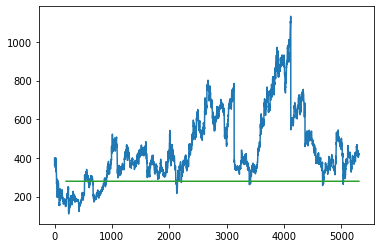

In [ ]:
#Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(BPCL)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(BPCL)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(BPCL)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(BPCL))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

1858

In [ ]:
x_input=test_data[1758:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.2773298147876655,
 0.2757660167130919,
 0.2784049259639349,
 0.27395787518936615,
 0.27855153203342614,
 0.2826076332893515,
 0.2807506230757953,
 0.28861848213849384,
 0.2819234716317256,
 0.2829008454283341,
 0.2787958754825783,
 0.27728094609783516,
 0.2513805404877095,
 0.25641401554024335,
 0.2582710257537995,
 0.2613497532131164,
 0.26643209695548065,
 0.26521037970972,
 0.2665298343351415,
 0.2648194301910766,
 0.2656501979181938,
 0.2787470067927479,
 0.2754728045741094,
 0.27087914773004934,
 0.2756682793334311,
 0.2834384010164687,
 0.28500219909104235,
 0.28578409812832917,
 0.29492254312661875,
 0.30938767531642475,
 0.2975614523774618,
 0.29262571470458876,
 0.296437472511362,
 0.2968284220300054,
 0.29140399745882817,
 0.27943116845037386,
 0.27087914773004934,
 0.26433074329277234,
 0.2679470263402238,
 0.26726286468259786,
 0.2764501783707179,
 0.2911107853198456,
 0.29785466451644427,
 0.3014220788740654,
 0.29795240189610517,
 0.30288813956897814,
 0.30220397791135

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17180276]
101
1 day input [0.27576602 0.27840493 0.27395788 0.27855153 0.28260763 0.28075062
 0.28861848 0.28192347 0.28290085 0.27879588 0.27728095 0.25138054
 0.25641402 0.25827103 0.26134975 0.2664321  0.26521038 0.26652983
 0.26481943 0.2656502  0.27874701 0.2754728  0.27087915 0.27566828
 0.2834384  0.2850022  0.2857841  0.29492254 0.30938768 0.29756145
 0.29262571 0.29643747 0.29682842 0.291404   0.27943117 0.27087915
 0.26433074 0.26794703 0.26726286 0.27645018 0.29111079 0.29785466
 0.30142208 0.2979524  0.30288814 0.30220398 0.2987343  0.30474515
 0.30098226 0.3018619  0.30083565 0.29472707 0.31476323 0.31261301
 0.30533157 0.31774422 0.32111616 0.34344915 0.33201388 0.3372917
 0.35073059 0.34814055 0.34574598 0.3436935  0.34848263 0.32815325
 0.3277623  0.33953966 0.34247178 0.33592337 0.31461663 0.30958315
 0.31549626 0.32175145 0.31896594 0.31256414 0.30181303 0.30694424
 0.31339491 0.31060939 0.31984557 0.31070713 0.310756   0.31085374
 0.31315056 0.30831256 0.28715242 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(BPCL)

5306

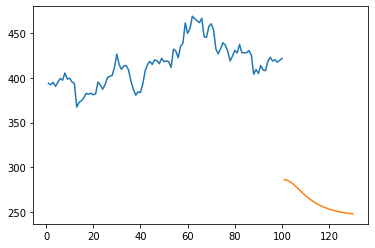

In [ ]:
plt.plot(day_new,scaler.inverse_transform(BPCL[5206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

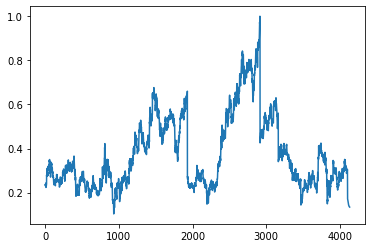

In [ ]:
BPCL_NEW=BPCL.tolist()
BPCL_NEW.extend(lst_output)
plt.plot(BPCL_NEW[1200:])

In [ ]:
BPCL_NEW=scaler.inverse_transform(BPCL_NEW).tolist()

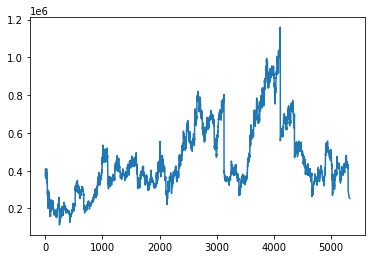

In [ ]:
plt.plot(BPCL_NEW)